<a href="https://colab.research.google.com/github/NooRSayeD/Data-Processing-and-Plotting/blob/main/iris_processed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from google.colab import files

In [5]:
# Step 2: Load the CSV file
df = pd.read_csv('iris_processed.csv')
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
# Encode the 'Species' column (categorical target)
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

In [7]:
# Summary statistics
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count     150.000000    150.000000     150.000000    150.000000   
mean        5.843333      3.054000       3.758667      1.198667   
std         0.828066      0.433594       1.764420      0.763161   
min         4.300000      2.000000       1.000000      0.100000   
25%         5.100000      2.800000       1.600000      0.300000   
50%         5.800000      3.000000       4.350000      1.300000   
75%         6.400000      3.300000       5.100000      1.800000   
max         7.900000      4.400000       6.900000      2.500000   

       Species_encoded  
count       150.000000  
mean          1.000000  
std           0.819232  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           2.000000  
max           2.000000  


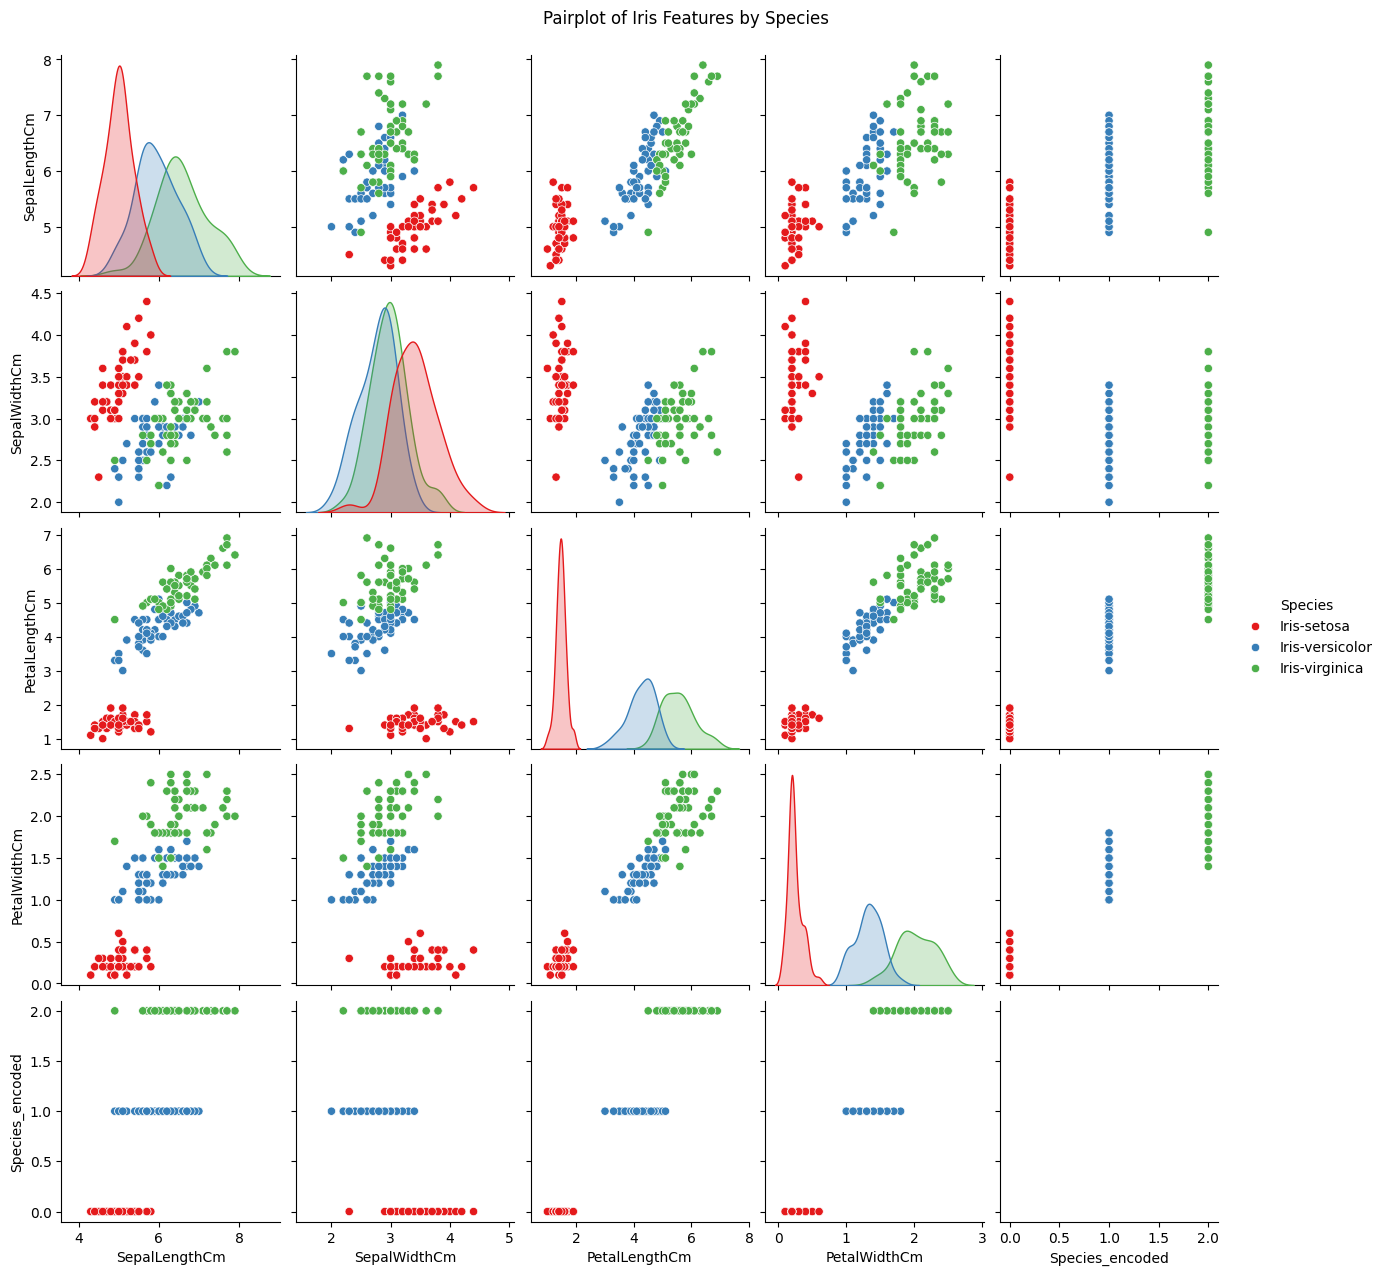

In [8]:
# Plot 1: Pairplot to visualize relationships between features colored by Species
sns.pairplot(df, hue='Species', palette='Set1')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

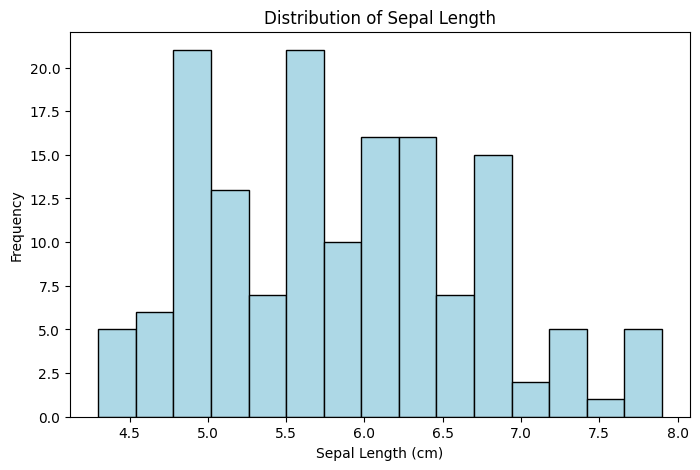

In [9]:
# Plot 2: Histogram - Distribution of Sepal Length
plt.figure(figsize=(8, 5))
df['SepalLengthCm'].hist(bins=15, edgecolor='black', color='lightblue', grid= False)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

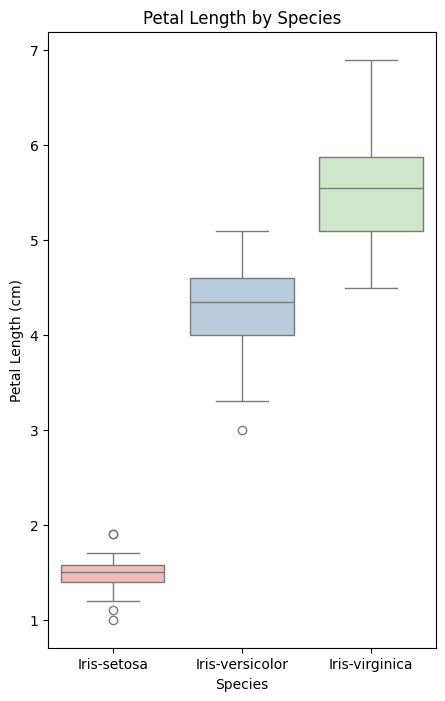

In [10]:
# Plot 3: Boxplot - Petal Length by Species
plt.figure(figsize=(5, 8))
sns.boxplot(x='Species', y='PetalLengthCm', hue='Species', data=df, palette='Pastel1', legend=False)
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

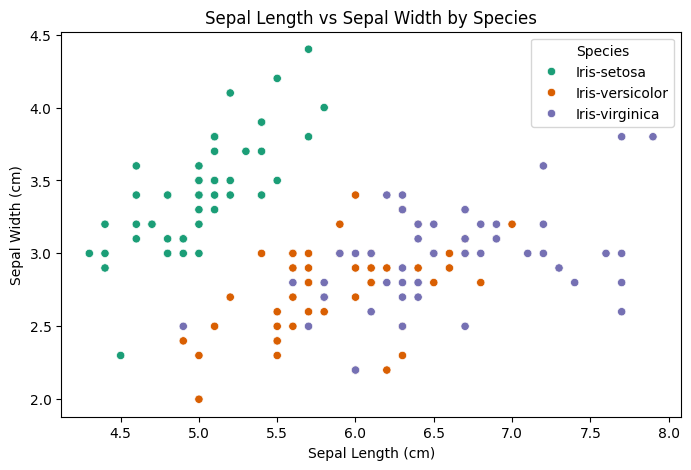

In [11]:
# Plot 4: Scatter plot - Sepal Length vs Sepal Width by Species
plt.figure(figsize=(8, 5))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette='Dark2')
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [122]:
# Prepare data for ML
X = df.drop(columns=['Species', 'Species_encoded'])
y = df['Species_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 24)

In [123]:
# ML Algorithm 1: Logistic Regression (Supervised Classification)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression Accuracy: 0.9777777777777777
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


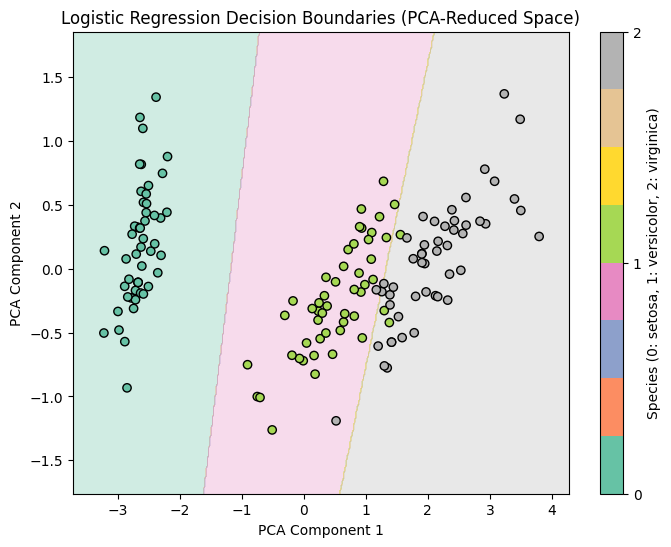

In [124]:

from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce X to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Create a mesh grid in the PCA space
x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Step 3: Transform mesh grid points back to original feature space for prediction
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original = pca.inverse_transform(mesh_points)
Z = lr.predict(mesh_points_original)
Z = Z.reshape(xx.shape)

# Step 4: Plot decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Set2, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set2, edgecolor='k')
plt.title('Logistic Regression Decision Boundaries (PCA-Reduced Space)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(ticks=[0, 1, 2], label='Species (0: setosa, 1: versicolor, 2: virginica)')
plt.show()

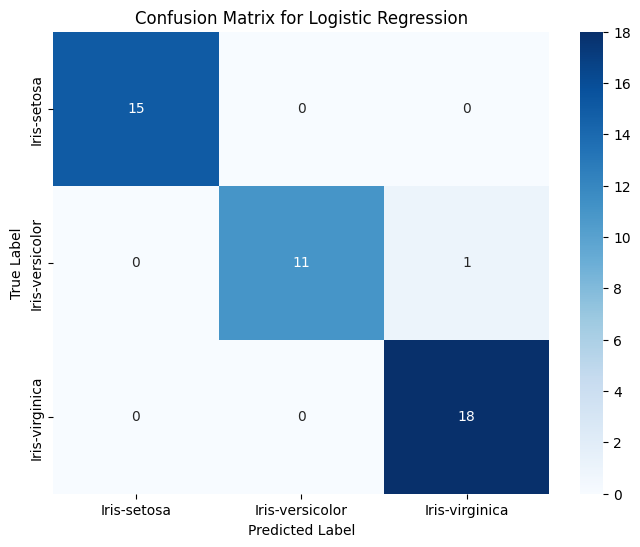

In [125]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [132]:
# Step 4: Prepare data for ML with only two columns
X = df[['SepalLengthCm', 'SepalWidthCm']]  # Select only two columns
y = df['Species_encoded']

In [133]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 24)

In [134]:
# Step 5: Logistic Regression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression Accuracy: 0.8222222222222222
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.64      0.75      0.69        12
 Iris-virginica       0.81      0.72      0.76        18

       accuracy                           0.82        45
      macro avg       0.82      0.82      0.82        45
   weighted avg       0.83      0.82      0.82        45



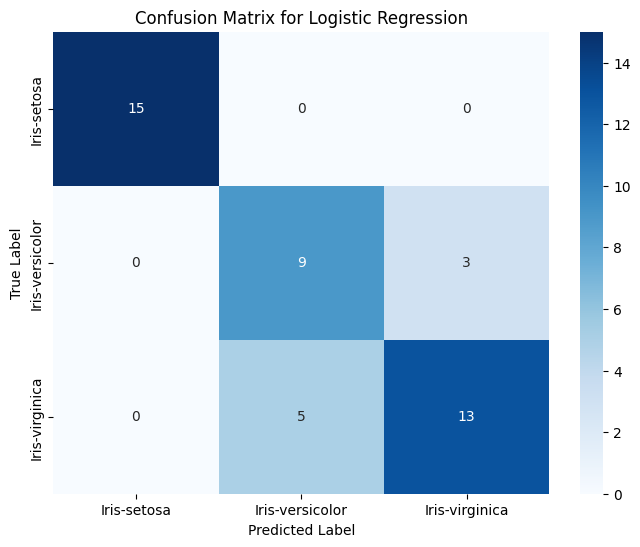

In [135]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


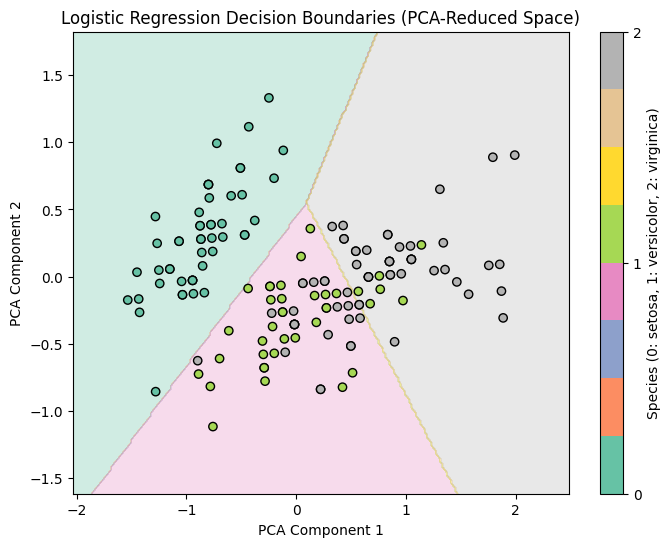

In [136]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce X to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Create a mesh grid in the PCA space
x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Step 3: Transform mesh grid points back to original feature space for prediction
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original = pca.inverse_transform(mesh_points)
Z = lr.predict(mesh_points_original)
Z = Z.reshape(xx.shape)

# Step 4: Plot decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Set2, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set2, edgecolor='k')
plt.title('Logistic Regression Decision Boundaries (PCA-Reduced Space)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(ticks=[0, 1, 2], label='Species (0: setosa, 1: versicolor, 2: virginica)')
plt.show()

In [137]:
# Step 4: Prepare data for ML with only two columns
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species_encoded']

In [138]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 24)

In [139]:
# Step 5: Logistic Regression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression Accuracy: 0.9777777777777777
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


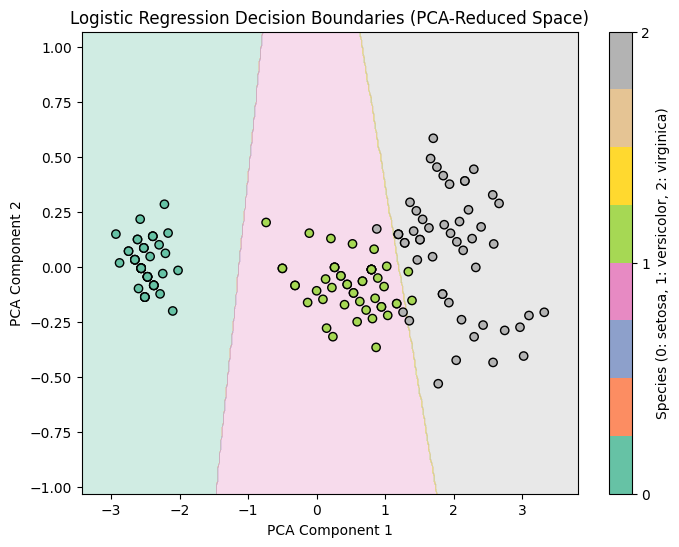

In [140]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce X to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Create a mesh grid in the PCA space
x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Step 3: Transform mesh grid points back to original feature space for prediction
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original = pca.inverse_transform(mesh_points)
Z = lr.predict(mesh_points_original)
Z = Z.reshape(xx.shape)

# Step 4: Plot decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Set2, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set2, edgecolor='k')
plt.title('Logistic Regression Decision Boundaries (PCA-Reduced Space)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(ticks=[0, 1, 2], label='Species (0: setosa, 1: versicolor, 2: virginica)')
plt.show()